In [7]:
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [8]:
!pip list

Package                      Version
---------------------------- --------------
absl-py                      2.0.0
accelerate                   0.29.2
aiohttp                      3.9.3
aiosignal                    1.3.1
altgraph                     0.17.2
anyio                        4.3.0
appnope                      0.1.3
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asgiref                      3.7.2
asttokens                    2.4.1
astunparse                   1.6.3
async-lru                    2.0.4
async-timeout                4.0.3
attrs                        23.2.0
Babel                        2.14.0
beautifulsoup4               4.12.3
bleach                       6.1.0
blinker                      1.7.0
boto3                        1.34.81
botocore                     1.34.81
Brotli                       1.1.0
cachetools                   5.3.2
certifi                      2023.11.17
cffi                        

In [9]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices("GPU")
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [10]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [11]:
import cv2
import imghdr

In [12]:
data_dir = "data"

In [13]:
image_exts = {"png", "jpg", "jpeg", "bmp"}

In [14]:
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    if os.path.isdir(class_path):  # Check if it's a directory
        for image in os.listdir(class_path):
            image_path = os.path.join(class_path, image)
            try:
                img = cv2.imread(image_path)
                img_type = imghdr.what(image_path)
                if img_type not in image_exts:
                    print(f"Image not in ext list {image_path}")
                    os.remove(image_path)
            except Exception as e:
                print(f"Issue with image {image_path}")
                # Optionally remove the problematic file
                # os.remove(image_path)

libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [15]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [16]:
data = tf.keras.utils.image_dataset_from_directory("data")

Found 445 files belonging to 2 classes.


2024-04-24 21:42:57.155885: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Max
2024-04-24 21:42:57.155907: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 36.00 GB
2024-04-24 21:42:57.155913: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 13.50 GB
2024-04-24 21:42:57.155955: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-24 21:42:57.155982: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:
data_iteretaor = data.as_numpy_iterator()

In [18]:
data_iteretaor

In [19]:
batch = data_iteretaor.next()

2024-04-24 21:42:57.461631: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:42:57.528526: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:42:57.649501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [20]:
batch

(array([[[[255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          ...,
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ]],
 
         [[255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          ...,
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ]],
 
         [[255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          ...,
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ]],
 
         ...,
 
         [[255.     , 255.     , 255.     ],
          [255.     , 255.     , 255.     ],
          [255.     , 255.    

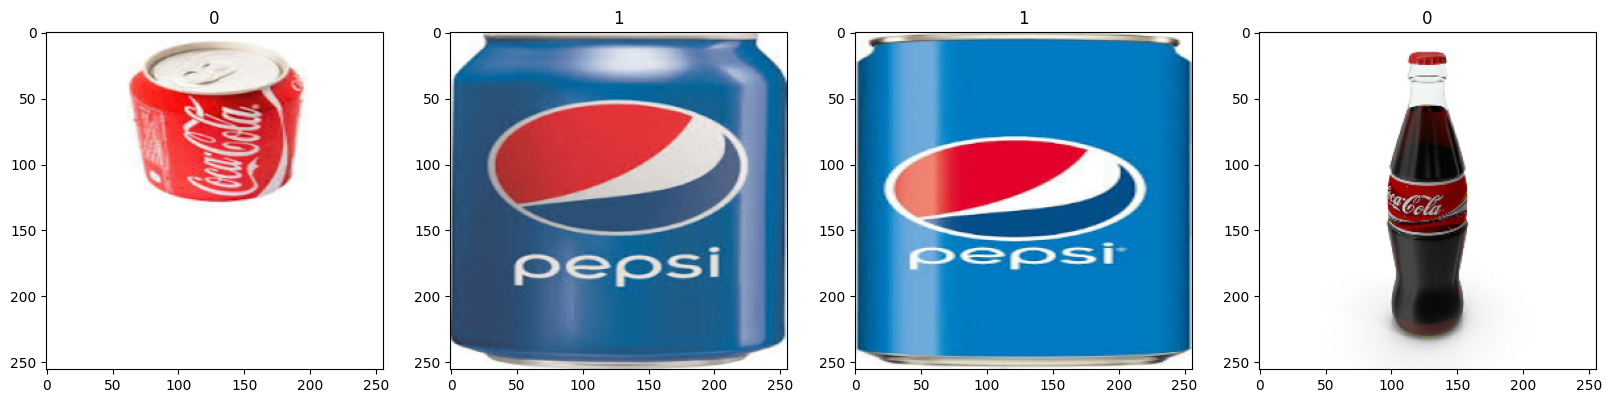

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Class 0 : Coca-Cola
Class 1 : Pepsi

In [22]:
### Data Scaling
data = data.map(lambda x, y: (x / 255, y))

In [23]:
data.as_numpy_iterator().next()

2024-04-24 21:42:58.322488: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:42:58.388989: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


(array([[[[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         [[0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ],
          [0.        , 0.        , 0.        ]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

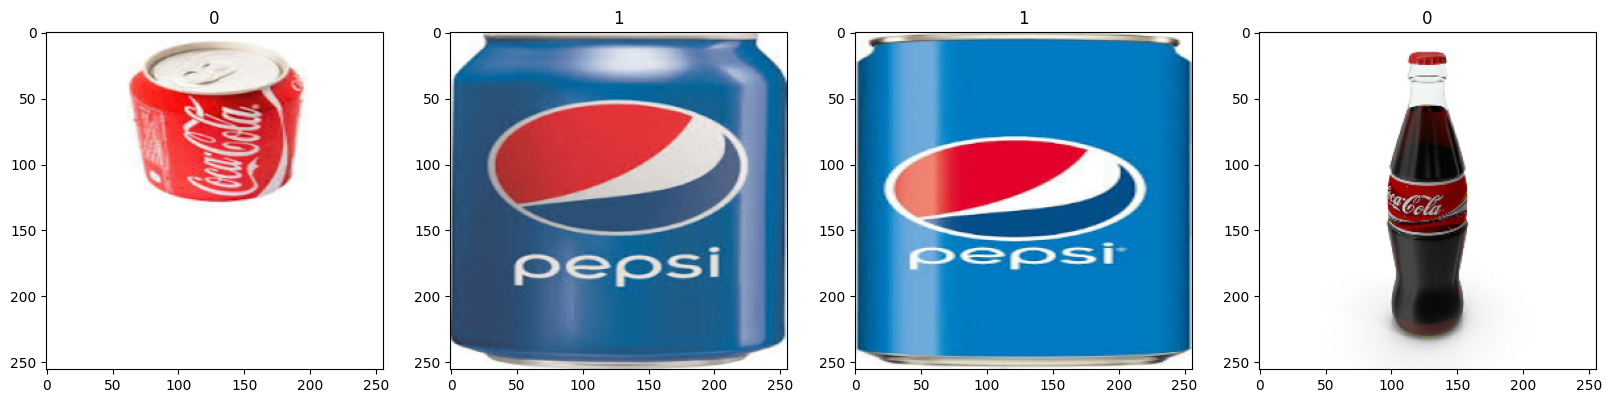

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [25]:
data_length = len(data)

In [26]:
train_size = int(data_length * 0.7)
val_size = int(data_length * 0.2)
test_size = data_length - train_size - val_size

In [27]:
train_size + val_size + test_size

14

In [28]:
val_size

2

In [29]:
test_size

3

In [30]:
train_size

9

In [31]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [32]:
len(test)

3

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the model
model = Sequential(
    [
        Conv2D(
            16, (3, 3), padding="same", activation="relu", input_shape=(256, 256, 3)
        ),
        MaxPooling2D(),
        Conv2D(32, (3, 3), padding="same", activation="relu"),
        MaxPooling2D(),
        Conv2D(16, (3, 3), padding="same", activation="relu"),
        MaxPooling2D(),
        Flatten(),
        Dense(256, activation="relu"),
        Dense(1, activation="sigmoid"),
    ]
)

# Compile the model (example)
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 128, 128, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 32, 32, 16)        0

In [34]:
logdir = "logs"

In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
hist = model.fit(
    train, epochs=20, validation_data=val, callbacks=[tensorboard_callback]
)

Epoch 1/20


2024-04-24 21:42:59.281645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
2024-04-24 21:42:59.530384: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:42:59.597531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:42:59.716120: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 1.5721 - accuracy: 0.5417

2024-04-24 21:43:03.142368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:03.211180: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:03.332285: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 5s 122ms/step - loss: 1.5721 - accuracy: 0.5417 - val_loss: 0.7474 - val_accuracy: 0.5000
Epoch 2/20


2024-04-24 21:43:03.864446: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:03.930312: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:04.051872: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 1.2130 - accuracy: 0.3507

2024-04-24 21:43:04.600861: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:04.667521: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:04.788876: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 123ms/step - loss: 1.2130 - accuracy: 0.3507 - val_loss: 0.4737 - val_accuracy: 0.7812
Epoch 3/20


2024-04-24 21:43:05.285788: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:05.352642: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:05.473611: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 2.0783 - accuracy: 0.7257

2024-04-24 21:43:06.023632: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:06.090700: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:06.212301: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 122ms/step - loss: 2.0783 - accuracy: 0.7257 - val_loss: 1.1373 - val_accuracy: 0.7188
Epoch 4/20


2024-04-24 21:43:06.706288: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:06.771842: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:06.893014: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.7980 - accuracy: 0.5139

2024-04-24 21:43:07.447894: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:07.514756: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:07.636511: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 123ms/step - loss: 0.7980 - accuracy: 0.5139 - val_loss: 0.8435 - val_accuracy: 0.3594
Epoch 5/20


2024-04-24 21:43:08.132533: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:08.197786: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:08.320081: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.6120 - accuracy: 0.6181

2024-04-24 21:43:08.877061: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:08.943982: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:09.067387: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 124ms/step - loss: 0.6120 - accuracy: 0.6181 - val_loss: 0.4713 - val_accuracy: 0.7656
Epoch 6/20


2024-04-24 21:43:09.564167: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:09.633848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:09.757178: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.5002 - accuracy: 0.7361

2024-04-24 21:43:10.314787: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:10.382562: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:10.504823: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 123ms/step - loss: 0.5002 - accuracy: 0.7361 - val_loss: 0.4158 - val_accuracy: 0.7656
Epoch 7/20


2024-04-24 21:43:11.000187: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:11.067053: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:11.190393: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.4474 - accuracy: 0.7778

2024-04-24 21:43:11.749065: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:11.817326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:11.939750: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 123ms/step - loss: 0.4474 - accuracy: 0.7778 - val_loss: 0.4776 - val_accuracy: 0.7656
Epoch 8/20


2024-04-24 21:43:12.431524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:12.501044: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:12.624760: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.3590 - accuracy: 0.8264

2024-04-24 21:43:13.181577: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:13.249956: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:13.373669: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 124ms/step - loss: 0.3590 - accuracy: 0.8264 - val_loss: 0.6253 - val_accuracy: 0.8594
Epoch 9/20


2024-04-24 21:43:13.872531: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:13.940934: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:14.064201: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.3173 - accuracy: 0.9167

2024-04-24 21:43:14.621706: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:14.688501: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:14.813327: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 124ms/step - loss: 0.3173 - accuracy: 0.9167 - val_loss: 0.3877 - val_accuracy: 0.8438
Epoch 10/20


2024-04-24 21:43:15.306778: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:15.375678: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:15.500792: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.2560 - accuracy: 0.9236

2024-04-24 21:43:16.056340: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:16.125839: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:16.249232: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 124ms/step - loss: 0.2560 - accuracy: 0.9236 - val_loss: 0.2816 - val_accuracy: 0.9375
Epoch 11/20


2024-04-24 21:43:16.747980: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:16.817219: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:16.940974: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.2435 - accuracy: 0.9306

2024-04-24 21:43:17.499151: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:17.570032: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:17.694197: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 124ms/step - loss: 0.2435 - accuracy: 0.9306 - val_loss: 0.2467 - val_accuracy: 0.9688
Epoch 12/20


2024-04-24 21:43:18.190717: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:18.259496: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:18.383192: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.2405 - accuracy: 0.9444

2024-04-24 21:43:18.942507: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:19.012535: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:19.135543: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 124ms/step - loss: 0.2405 - accuracy: 0.9444 - val_loss: 0.0973 - val_accuracy: 1.0000
Epoch 13/20


2024-04-24 21:43:19.634161: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:19.703495: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:19.827238: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.2201 - accuracy: 0.9444

2024-04-24 21:43:20.385782: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:20.455897: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:20.580208: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 125ms/step - loss: 0.2201 - accuracy: 0.9444 - val_loss: 0.1862 - val_accuracy: 0.9688
Epoch 14/20


2024-04-24 21:43:21.074696: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:21.144284: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:21.267853: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.2024 - accuracy: 0.9479

2024-04-24 21:43:21.825747: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:21.895950: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:22.020356: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 124ms/step - loss: 0.2024 - accuracy: 0.9479 - val_loss: 0.2075 - val_accuracy: 0.9531
Epoch 15/20


2024-04-24 21:43:22.515066: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:22.584379: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:22.708653: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.1873 - accuracy: 0.9618

2024-04-24 21:43:23.265795: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:23.335307: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:23.458812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 125ms/step - loss: 0.1873 - accuracy: 0.9618 - val_loss: 0.2356 - val_accuracy: 0.9375
Epoch 16/20


2024-04-24 21:43:23.958897: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:24.029178: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:24.153007: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.1109 - accuracy: 0.9653

2024-04-24 21:43:24.712485: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:24.782523: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:24.907349: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 124ms/step - loss: 0.1109 - accuracy: 0.9653 - val_loss: 0.2319 - val_accuracy: 0.9062
Epoch 17/20


2024-04-24 21:43:25.401162: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:25.471040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:25.596469: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.1583 - accuracy: 0.9514

2024-04-24 21:43:26.154915: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:26.224848: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:26.348328: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 124ms/step - loss: 0.1583 - accuracy: 0.9514 - val_loss: 0.1875 - val_accuracy: 0.9375
Epoch 18/20


2024-04-24 21:43:26.843793: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:26.914229: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:27.038712: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.1930 - accuracy: 0.9375

2024-04-24 21:43:27.597524: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:27.667981: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:27.791594: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 125ms/step - loss: 0.1930 - accuracy: 0.9375 - val_loss: 0.1344 - val_accuracy: 0.9844
Epoch 19/20


2024-04-24 21:43:28.291959: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:28.361950: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:28.486295: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.2164 - accuracy: 0.9340

2024-04-24 21:43:29.044029: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:29.113418: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:29.236516: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 124ms/step - loss: 0.2164 - accuracy: 0.9340 - val_loss: 0.0769 - val_accuracy: 0.9688
Epoch 20/20


2024-04-24 21:43:29.733154: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:29.804031: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:29.928721: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.1393 - accuracy: 0.9583

2024-04-24 21:43:30.488758: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:30.559204: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:30.682812: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 1s 124ms/step - loss: 0.1393 - accuracy: 0.9583 - val_loss: 0.0728 - val_accuracy: 0.9688


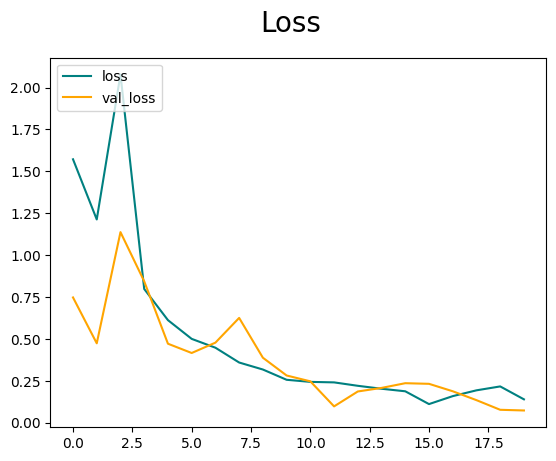

In [39]:
fig = plt.figure()
plt.plot(hist.history["loss"], color="teal", label="loss")
plt.plot(hist.history["val_loss"], color="orange", label="val_loss")
fig.suptitle("Loss", fontsize=20)
plt.legend(loc="upper left")
plt.show()

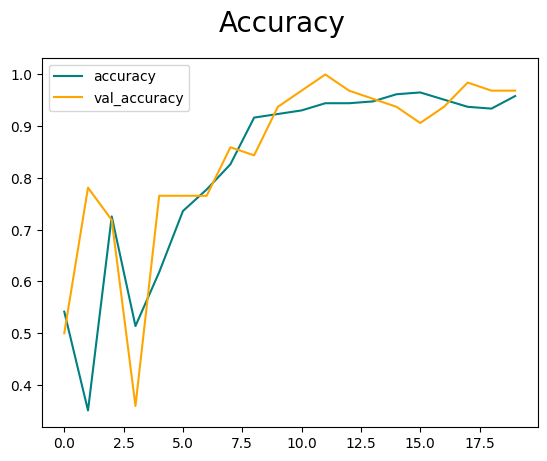

In [40]:
fig = plt.figure()
plt.plot(hist.history["accuracy"], color="teal", label="accuracy")
plt.plot(hist.history["val_accuracy"], color="orange", label="val_accuracy")
fig.suptitle("Accuracy", fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [41]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [42]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [43]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

2024-04-24 21:43:43.611326: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:43.681588: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile
2024-04-24 21:43:43.806892: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 1s 532ms/step


In [44]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.9130435, shape=(), dtype=float32) tf.Tensor(0.97849464, shape=(), dtype=float32)


In [45]:
import cv2

In [57]:
def capture_image_from_camera(file_path):
    # Start the camera
    cap = cv2.VideoCapture(0)
    if not cap.isOpened():
        print("Cannot open camera")
        return

    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        if not ret:
            print("Can't receive frame (stream end?). Exiting ...")
            break

        # Display the resulting frame
        cv2.imshow("Press Space to capture", frame)

        # Press 'Space' to save the image and exit
        if cv2.waitKey(1) == ord(" "):
            cv2.imwrite(file_path, frame)  # Save the frame as an image file
            print(f"Image saved to {file_path}")
            break

    # When everything done, release the capture and close windows
    cap.release()
    cv2.destroyAllWindows()


# Path where the image will be saved
image_path = "your_image_path_here.jpg"
capture_image_from_camera(image_path)

Image saved to your_image_path_here.jpg


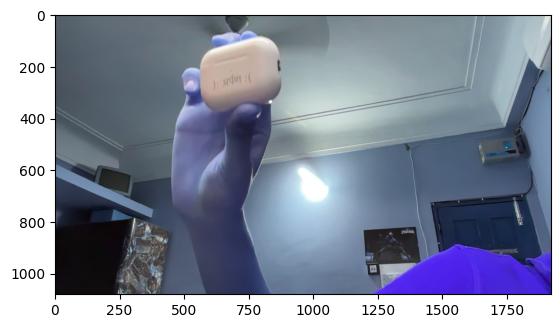

In [58]:
img = cv2.imread("your_image_path_here.jpg")
plt.imshow(img)
plt.show()

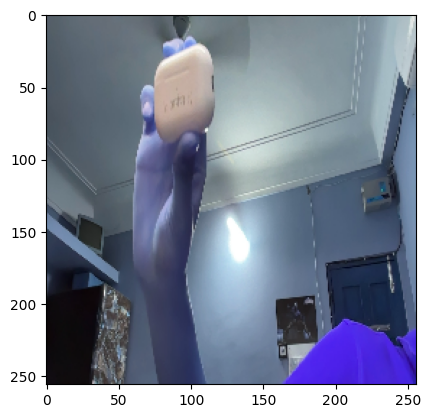

In [59]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [60]:
yhat = model.predict(np.expand_dims(resize / 255, 0))

1/1 [==============================] - 0s 12ms/step


In [61]:
if yhat > 0.5:
    print(f"Predicted class is Coke")
else:
    print(f"Predicted class is Pepsi")

Predicted class is Coke


In [62]:
from tensorflow.keras.models import load_model

In [63]:
model.save(os.path.join("models", "imageclassifier.h5"))

/Users/arpansethi/Library/Python/3.9/lib/python/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
